In [1]:
from random import choice
from string import ascii_lowercase, digits

import atoti as tt

import pandas as pd

In [2]:
# generate date range using pandas

In [3]:
date_range = pd.date_range(start="23/6/2018", end="10/5/2021")

In [4]:
len(date_range)

1201

In [5]:
dates_df = pd.DataFrame(data=date_range, columns=["Dates"])
dates_df.head()

,Dates
0,2018-06-23
1,2018-06-24
2,2018-06-25
3,2018-06-26
4,2018-06-27


In [6]:
chars = ascii_lowercase + digits
lst = ["".join(choice(chars) for _ in range(3)) for _ in range(len(dates_df))]
lst2 = ["".join(choice(chars) for _ in range(5)) for _ in range(len(dates_df))]

In [7]:
dates_df["Hier1"] = lst
dates_df["Hier2"] = lst2

In [8]:
dates_df["Value"] = 1
dates_df.head()

,Dates,Hier1,Hier2,Value
0,2018-06-23,e9c,n4kuk,1
1,2018-06-24,a5l,x7yna,1
2,2018-06-25,4rq,t15bf,1
3,2018-06-26,5xd,99lo9,1
4,2018-06-27,1lc,mn0f1,1


In [12]:
session = tt.Session(port=9092)

In [13]:
session_tbl = session.read_pandas(dates_df, keys=["Dates", "Hier1"], table_name="Dates")

In [14]:
cube = session.create_cube(session_tbl, "Date cube")

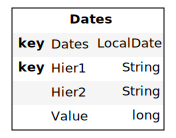

In [15]:
cube.schema

In [16]:
cube.create_date_hierarchy(
    "Date parts",
    column=session_tbl["Dates"],
    levels={"Year": "yyyy", "Month": "MM", "Day": "d"},
)

In [17]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [18]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [19]:
m["multiply"] = m["Value.SUM"] * 5

In [22]:
m["average"] = tt.agg.mean(m["Value.SUM"] * 5, scope=tt.OriginScope(l["Hier1"]))

In [23]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [26]:
m["YTD"] = tt.agg.sum(
    m["Value.SUM"], scope=tt.CumulativeScope(level=l["Day"], partitioning=l["Year"])
)

In [27]:
m["YTM"] = tt.agg.sum(
    m["Value.SUM"], scope=tt.CumulativeScope(level=l["Month"], partitioning=l["Year"])
)

In [28]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [29]:
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Date cube', _hierarchies=..., _measures=Measures())>, _cube_name='Date cube')

In [30]:
# full month's value = Value.SUM

m["Monthly value"] = tt.parent_value(m["Value.SUM"], degrees={h["Date parts"]: 1})

In [31]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [34]:
m["Last year parent"] = tt.shift(
    m["Value.SUM"], cube.hierarchies[("Dates", "Date parts")], offset=-1
)

In [35]:
m["Last year value"] = tt.parent_value(
    m["Last year parent"], degrees={h["Date parts"]: 2}
)

In [36]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.